
# Ejercicio 1

El circuito de la figura corresponde al circuito equivalente simplificado de un receptor de RF. 
Se desea amplificar una señal de frecuencia $F_c = 100 MHz$.

Suponer que  el inductor tiene un factor de merito de $Q_o = 50$ y el capacitor tiene un factor de merito de $Q_o = \infty$.

La fuente tiene una potencia disponible $P_{disp}= 10 \mu W$ y su resistencia interna es $r_g=1K\Omega$.

![ejemplo4-cuatrocientos](fig/ejercicio1g.png)

Donde: $g_{11} = 1.25 mS$, $g_{22} = 0.1 mS$ y $g_m = 100 mS$

Determinar para una atenuación de $|A_v|(120MHz) = -20 dB$ respecto a la frecuencia de sintonia. 

Diseñar para máxima transferencia de energía a Q constante:

1. $R_L$
2. $Q_{c}$
3. $L$ 
4. $C$ 
5. $A_{v_o} = \frac{v_o}{v_g}$ 
6. El ancho de banda $BW$ del amplificador. 
7. $P_{R_L}$ 
8. $|A_{v_o}|$ para $80 MHz$



Respuestas

1. $R_L$

$$r_{22} = \frac{1}{0.1mS} = 10K\Omega$$

Para máxima transferencia de energía a Q constante  

$$R_L = r_{22} = 10K\Omega$$

2. $Q_c$

Para el calculo de $Q_c$ empleamos la expresión de la transferencia  de tensión del simple sintonizado.

$$|\bar{A_v}| =   \frac{1}{ \sqrt{1 + Q_c^2(\frac{f}{f_o}-\frac{ f_o}{f})^2} }$$

Buscamos una atenuación de $20 dB$ a $f=120 MHz$.

$$|\bar{A_v}|(120MHz) = \frac{1}{ 10^{\frac{20}{20} } }$$

$$\frac{1}{10} =   \frac{1}{ \sqrt{1 + Q_c^2(\frac{120MHz}{100MHz}-\frac{ 100MHz}{120MHz})^2} }$$

$$10 =    \sqrt{1 + Q_c^2(\frac{120MHz}{100MHz}-\frac{ 100MHz}{120MHz})^2}$$

$$Q_c = \frac{\sqrt{10^2 - 1}}{\frac{120MHz}{100MHz}-\frac{ 100MHz}{120MHz}}$$


$$Q_c = 27.136$$

3. $L$

A partir de $Q_c$ es posible encontrar el inductor mediante la expresión

$$\frac{1}{Q_c} =  \frac{1}{Q_o} + \frac{\omega L}{r_{ext}}$$

donde $r_{ext} = \frac{r_{22} R_L }{ r_{22}+  R_L} =  5K\Omega$

$$\omega_o L = r_{ext} (\frac{1}{Q_c} -  \frac{1}{Q_o})$$

$$\omega_o L = 5K\Omega (\frac{1}{27.136} -  \frac{1}{50})$$

$$\omega_o L =  12.48 \Omega$$

El inductor $L = 19.86 nHy$

4. $C$

El capacitor $C$

$$C = \frac{1}{L \omega_o^2}$$

$$C = 127.50 pF$$

5. $|A_{vo}|$

$$|A_{vo}| = \frac{r_{11}}{r_{11}+r_g} \cdot gm R_t$$

$$|A_{vo}| = \frac{r_{11}}{r_{11}+r_g} \cdot gm Q_c \omega_o L$$

$$|A_{vo}| = \frac{800\Omega}{800\Omega+1K\Omega} \cdot 100mS \cdot 27.13 \cdot 2 \pi 100MHz \cdot 19.86 nHy$$


$$|A_{vo}| =  101.618$$

6. El ancho de banda $BW$ del amplificador.

$$BW = \frac{f_o}{Q_c} =  \frac{100 MHz}{27.13} =  3.685 MHz$$

 
7. $P_{R_L}$ 

$$P_{R_L} = P_{disp} (1 - \frac{Q_c}{Q_o})^2$$



8. $|A_{v_o}|(80 MHz)$

$$|A_{v_o}|(80 MHz) = \frac{1}{ \sqrt{1 + Q_c^2(\frac{80MHz}{100MHz}-\frac{ 100MHz}{80MHz})^2} }$$


$$|A_{v_o}|(80 MHz) =  8.294$$
$$|A_{v_o}|(80 MHz) = 18.375 dB$$

In [14]:
import myplot as myp
import numpy as np
import matplotlib.pyplot as plt

def AvF(f,fo,Qc,Avo = 1):
    return -Avo/(1+1j*Qc*(f/fo-fo/f))

def AvA(f,fo,Qc,Avo = 1):
    X = 2*Qc*(f-fo)/fo
    return -Avo/(1+1j*X)


# Datos para los calculos 
Pdisp = 10e-6 

fo    = 100e6
wo    = 2*np.pi*fo

rg    = 1e3

g11   = 1.25e-3
b11   = 0

g21    = 0.1
b21    = 0

g12    = 0.1
b12    = 0

g22   = 0.10e-3
b22   = 0

Qo    = 50
Att   = 20
fatt  = 120e6

print("1.")
r11   = 1/g11
r22   = 1/g22
RL    = r22 
print('RL  =  {:1.2f} ohm'.format(RL))

print("2.")
Qc = ((10**(Att/20))**2-1)**0.5/(fatt/fo-fo/fatt)
print('Qc  =  {:1.2f}'.format(Qc))

print("3.")
rext = r22*RL / (r22+RL)
L = rext*(1/Qc-1/Qo)/wo
print('L  =  {:1.3f} nHy'.format(L/1e-9))

print("4.")
C = 1/(wo**2*L)
print('C  =  {:1.3f} pF'.format(C/1e-12))

print("5.")
Avo = r11 /(r11+rg) * abs(g21+1j*b21) * Qc * wo*L

print('Avo  =  {:1.3f}'.format(Avo))

print('Avo  =  {:1.3f} dB'.format(20*np.log10(Avo)))


print("6.")

BW = fo/Qc

print('BW  =  {:1.3f} MHz'.format(BW/1e6))

print("7.")

PRL = Pdisp * (1-Qc/Qo)**2

print("8.")

Av80 = (abs(AvF(80e6,fo,Qc,Avo )))

print('Av80  =  {:1.3f}'.format(Av80))

print('Av80  =  {:1.3f} dB'.format(20*np.log10(Av80)))

1.
RL  =  10000.00 ohm
2.
Qc  =  27.14
3.
L  =  134.099 nHy
4.
C  =  18.889 pF
5.
Avo  =  101.618
Avo  =  40.139 dB
6.
BW  =  3.685 MHz
7.
8.
Av80  =  8.294
Av80  =  18.375 dB


In [2]:
vg = (Pdisp*8*rg)**0.5

print('.param vg  = {:1.3f}'.format(vg))
print('.param rg  = {:1.2f}'.format(rg))
print('.param r11 = {:1.2f}'.format(r11))
print('.param g21 = {:1.2f}'.format(g21))
print('.param b21 = {:1.2f}'.format(c21))
print('.param r22 = {:1.2f}'.format(r22))
print('.param C = {:1.2e}'.format(C))
print('.param L = {:1.2e}'.format(L))

print('.param RL = {:1.2f}'.format(RL))


.param vg  = 0.283
.param rg  = 1000.00
.param r11 = 800.00
.param g21 = 0.10
.param b21 = 0.00
.param r22 = 10000.00
.param C = 1.89e-11
.param L = 1.34e-07
.param RL = 10000.00


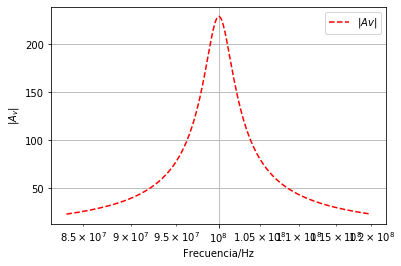

/home/aalmela/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


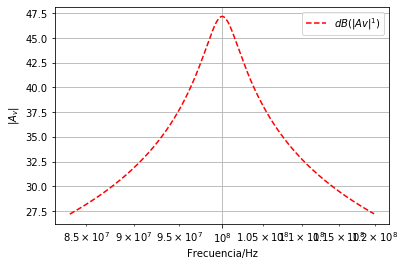

In [13]:
# Ahora calculando en la hoja de calculo 
f    =  np.arange(fo/1.2,fo*1.2,fo/1000)                   # Defino el array de frecuencia
Av   = AvF(f,fo,Qc,Avo = gm*L*wo*Qc)


plt.semilogx(f , np.abs(Av)  , 'r--', label='$|Av|$' )
plt.grid(True)
plt.legend()
plt.ylabel('$|A_{v}|$')
plt.xlabel('Frecuencia/Hz')
#plt.savefig('figures/ejemplo3Av3.png')
plt.show()


plt.semilogx(f , 20*np.log10(Av**1)  , 'r--', label='$dB(|Av|^1)$' )
plt.grid(True)
plt.legend()
plt.ylabel('$|A_{v}|$')
plt.xlabel('Frecuencia/Hz')
#plt.savefig('figures/ejemplo3Av3dB.png')
plt.show()